In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_csv('/content/drive/My Drive/App/mtcars - Data.csv')

# **Data Preparation**

> **Check Missing Values**

In [ ]:
df.head()

,Cars,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cars    32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [ ]:
df.isnull().sum()

Cars    0
mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

> **Add New A Column : mpg_level**

In [ ]:
df['mpg_level']=df['mpg'].apply(lambda x: 'low' if x<20 else ('medium' if x>=20 and x<=30 else 'hard'))

In [ ]:
df.mpg_level.value_counts()

low       18
medium    10
hard       4
Name: mpg_level, dtype: int64

> **Replace** 

In [228]:
df['am'] = df['am'].astype('str').str.replace('0','Automatic').replace('1','Manual')
df['vs'] = df['vs'].astype('str').str.replace('0','V-shape').replace('1','Straight')


#**EDA**

In [ ]:
df

,Cars,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg_level
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,V-shape,Manual,4,4,medium
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,V-shape,Manual,4,4,medium
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,Flat,Manual,4,1,medium
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,Flat,Automatic,3,1,medium
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,V-shape,Automatic,3,2,low
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,Flat,Automatic,3,1,low
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,V-shape,Automatic,3,4,low
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,Flat,Automatic,4,2,medium
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,Flat,Automatic,4,2,medium
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,Flat,Automatic,4,4,low


#**Car Efficiency**


##The Most Fuel-Efficient Car in General

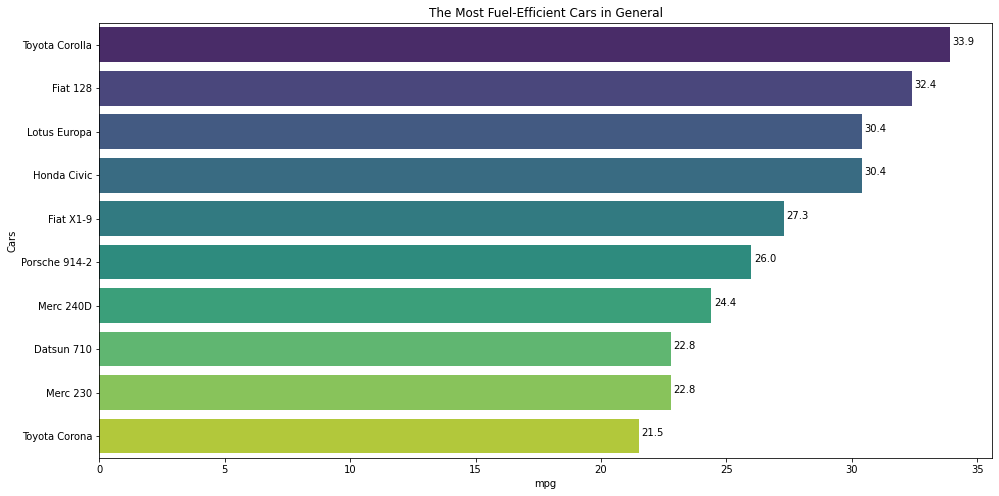

In [219]:
#@title
mec=df.sort_values('mpg',ascending=False)[['Cars','mpg']].head(10).reset_index(drop=True)
fig,ax=plt.subplots(figsize=(16,8))
sns.barplot(x='mpg', y='Cars', data=mec, palette='viridis').set(title='The Most Fuel-Efficient Cars in General')

y = []
for p in ax.patches:
    y.append(p.get_y())

for i in range(0, mec.shape[0]):
    plt.text(mec.loc[i,'mpg']+0.1, y[i]+0.4, str(mec.loc[i,'mpg']))

Generally, the most fuel-efficient car is **Toyota Corolla** with the highest MPG : **33.9 miles/US gallon**.

## Car Efficiency by Cylinder

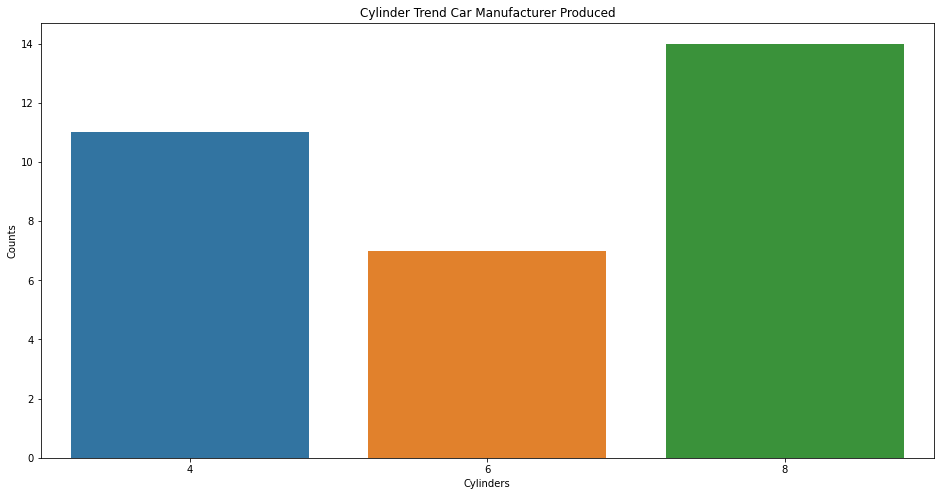

In [ ]:
fig,ax=plt.subplots(figsize=(16,8))

ax = sns.barplot(x = df.cyl.value_counts().index, y = df.cyl.value_counts().values).set(title='Cylinder Trend Car Manufacturer Produced', xlabel='Cylinders', ylabel='Counts')

Looks like car manufacturer in this period of time like to produce **8** and **4 cylinder cars**. Since cylinder has a big negative correlation with mpg, so I'll analyze the mpg per cylinder class.

In [ ]:
c4 = df[df.cyl==4].reset_index(drop=True)
c6 = df[df.cyl==6].reset_index(drop=True)
c8 = df[df.cyl==8].reset_index(drop=True)

## 4 Cylinder Class

In [ ]:
c4

,Cars,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg_level
0,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,Flat,Manual,4,1,medium
1,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,Flat,Automatic,4,2,medium
2,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,Flat,Automatic,4,2,medium
3,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,Flat,Manual,4,1,hard
4,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,Flat,Manual,4,2,hard
5,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,Flat,Manual,4,1,hard
6,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,Flat,Automatic,3,1,medium
7,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,Flat,Manual,4,1,medium
8,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,V-shape,Manual,5,2,medium
9,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,Flat,Manual,5,2,hard


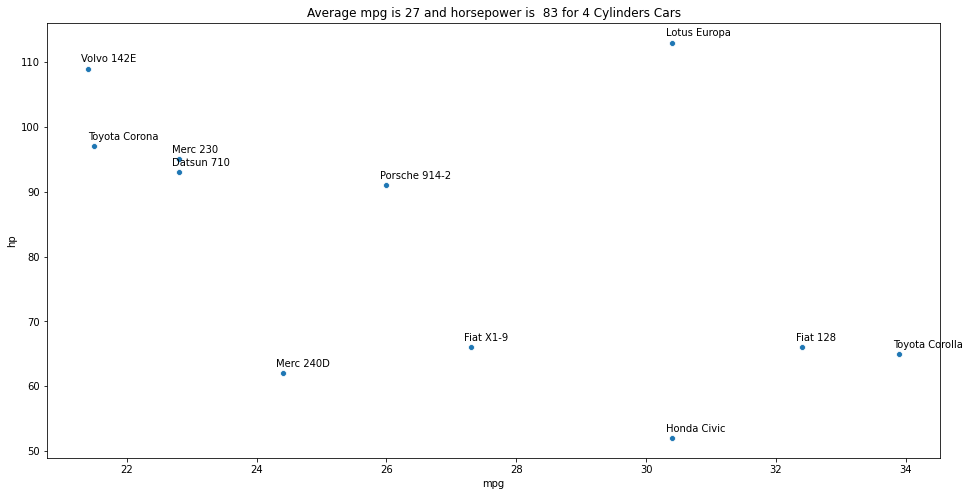

In [ ]:
fig,ax=plt.subplots(figsize=(16,8))

ax = sns.scatterplot(x='mpg', y='hp', data=c4, palette='Reds_r').set(title='Average mpg is {:2.0f} and horsepower is {:3.0f} for 4 Cylinders Cars'.format(c4.mpg.mean(),c4.hp.mean()))
for i in range(0,c4.shape[0]):
  ax = plt.text(c4.loc[i,'mpg']-0.1, c4.loc[i,'hp']+1, c4.loc[i,'Cars'])

For 4 cylinders cars, **Toyota Corolla** has the highest mpg, but **Lotus Europe** is the best deal for this class since it has high mpg but also highest horsepower which make this the fastest in this class.

## 6 Class Cylinder

In [ ]:
c6

,Cars,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg_level
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,V-shape,Manual,4,4,medium
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,V-shape,Manual,4,4,medium
2,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,Flat,Automatic,3,1,medium
3,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,Flat,Automatic,3,1,low
4,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,Flat,Automatic,4,4,low
5,Merc 280C,17.8,6,167.6,123,3.92,3.440,18.90,Flat,Automatic,4,4,low
6,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.50,V-shape,Manual,5,6,low


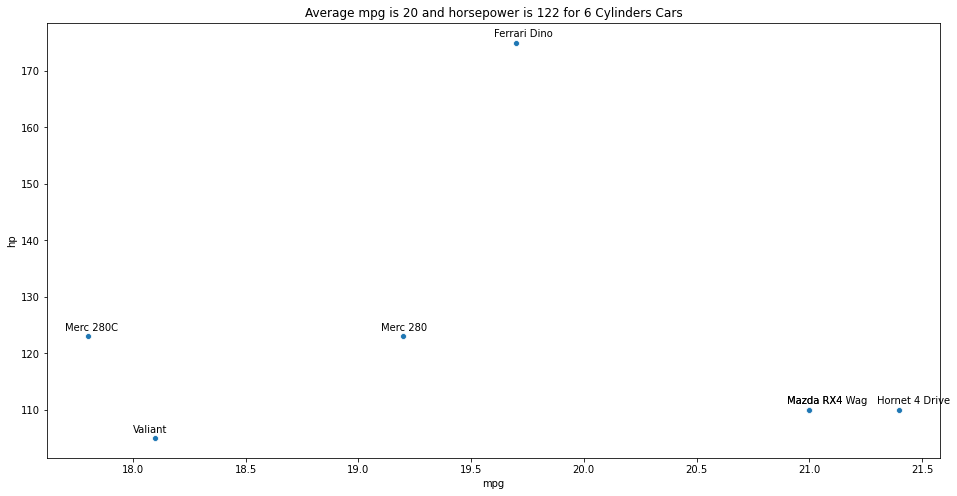

In [ ]:
fig,ax=plt.subplots(figsize=(16,8))

ax = sns.scatterplot(x='mpg', y='hp', data=c6, palette='Reds_r').set(title='Average mpg is {:2.0f} and horsepower is {:3.0f} for 6 Cylinders Cars'.format(c6.mpg.mean(),c6.hp.mean()))
for i in range(0,c6.shape[0]):
  ax = plt.text(c6.loc[i,'mpg']-0.1, c6.loc[i,'hp']+1, c6.loc[i,'Cars'])

For 6 cylinders cars, **Hornet 4 Drive** has the highest mpg, but **Ferrari Dino** is the best deal for this class since it has high mpg but also highest horsepower which make this the fastest in this class.

## 8 Cylinders Class

In [ ]:
c8

,Cars,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg_level
0,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,V-shape,Automatic,3,2,low
1,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,V-shape,Automatic,3,4,low
2,Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,V-shape,Automatic,3,3,low
3,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,V-shape,Automatic,3,3,low
4,Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,V-shape,Automatic,3,3,low
5,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,V-shape,Automatic,3,4,low
6,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,V-shape,Automatic,3,4,low
7,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,V-shape,Automatic,3,4,low
8,Dodge Challenger,15.5,8,318.0,150,2.76,3.520,16.87,V-shape,Automatic,3,2,low
9,AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.30,V-shape,Automatic,3,2,low


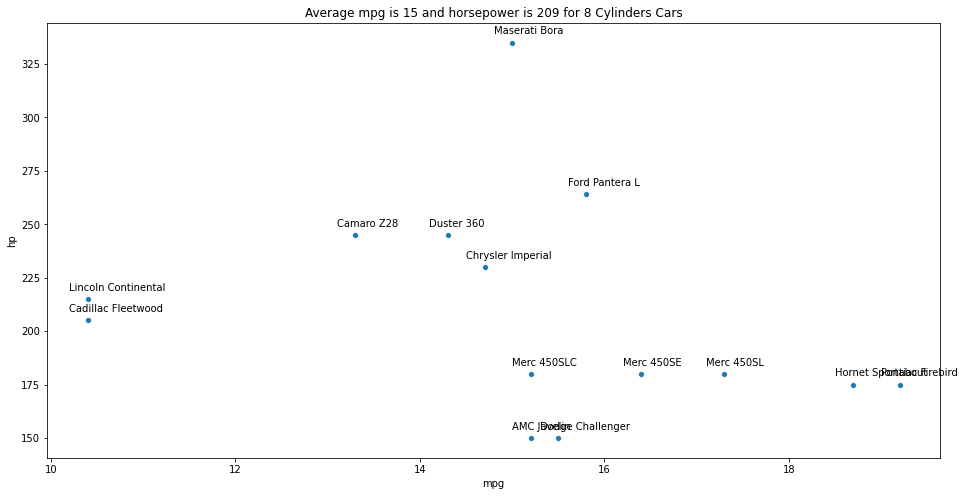

In [ ]:
#@title
fig,ax=plt.subplots(figsize=(16,8))

ax = sns.scatterplot(x='mpg', y='hp', data=c8, palette='Reds_r').set(title='Average mpg is {:2.0f} and horsepower is {:3.0f} for 8 Cylinders Cars'.format(c8.mpg.mean(),c8.hp.mean()))
for i in range(0,c8.shape[0]):
  ax = plt.text(c8.loc[i,'mpg']-0.2, c8.loc[i,'hp']+4, c8.loc[i,'Cars'])

For 8 cylinders cars, **Pontiac Firebird** has the highest mpg, but **Maserati Bora** is the best deal for this class since it has high mpg but also highest horsepower which make this the fastest in this class.

# **"Real Men Use Three Pedals" They Say...**
In this section, I compare the speed between manual and automatic transmission

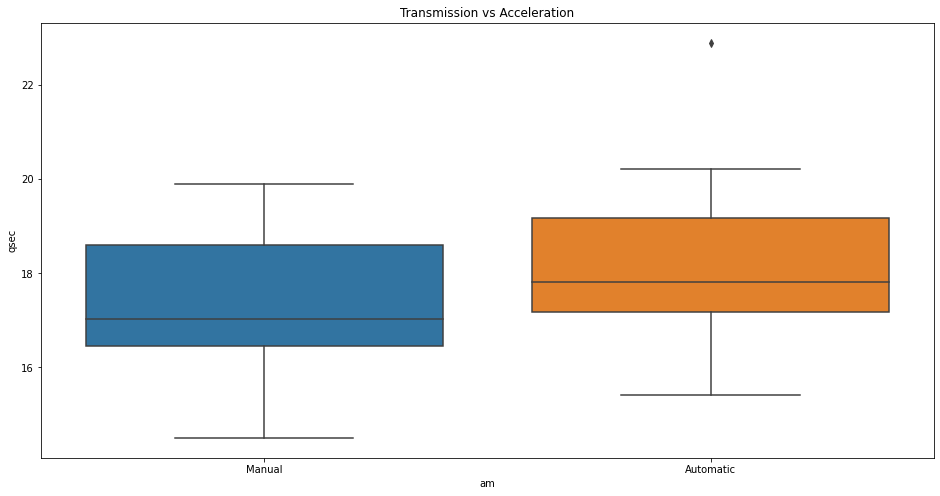

In [ ]:
fig,ax=plt.subplots(figsize=(16,8))
ax = sns.boxplot(x='am', y ='qsec', data=df).set(title='Transmission vs Acceleration')

Visually, Manual transmission cars are faster than automatic cars, but are they that different? I will test it with t-test two samples independent hypotesis test.

In [ ]:
#Separate 2 samples
Manual = df[df.am=='Manual'][['qsec']].values.reshape(-1)
Auto = df[df.am=='Automatic'][['qsec']].values.reshape(-1)

#Import scipy
from scipy.stats import ttest_ind

t_stats , pval = ttest_ind(Manual,Auto)

#H0: Average qsec for both type are equal
#H1: Average qsec for both type are not-equal

print('p-value {:1.2f} < alpha (0.5) which means H0 is rejected. The mean between two transmissions is not equal,\nbut they are not significantly different because the t-stats value is only {:1.2f}'.format(pval,abs(t_stats)))

p-value 0.21 < alpha (0.5) which means H0 is rejected. The mean between two transmissions is not equal,
but they are not significantly different because the t-stats value is only 1.29


##**Correlation**

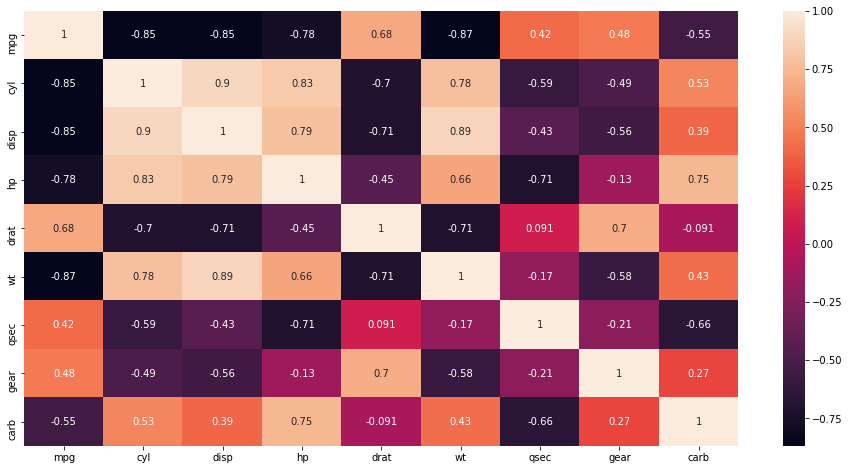

In [220]:
cor = df.corr()
fig,ax=plt.subplots(figsize=(16,8))

sns.heatmap(cor, annot=True)

##Displacement vs Horsepower by Engine

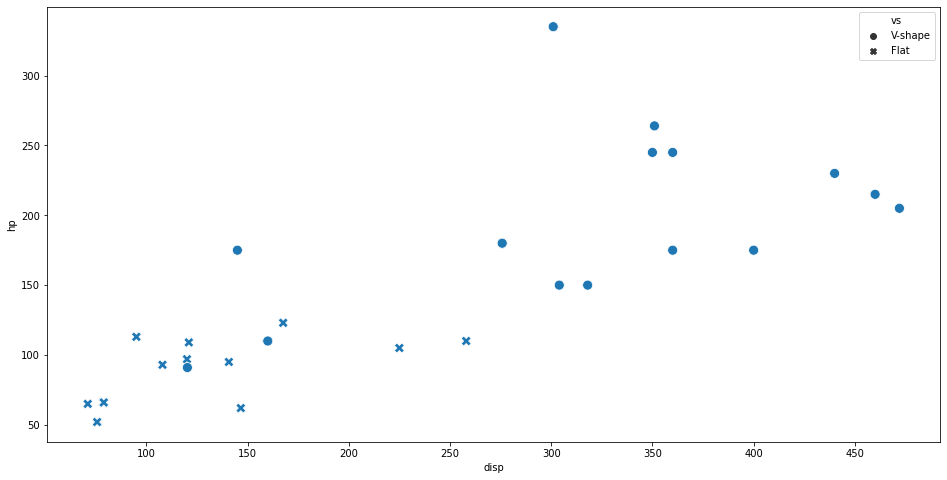

In [ ]:
fig,ax=plt.subplots(figsize=(16,8))
ax = sns.scatterplot(x="disp", y="hp", style="vs",s=100,data=df)

We can see that average of displacement value from **V-shape engine** is above **250cu.in** and it has the highest horsepower : **above 300** . Meanwhile, displacement of **Straight engine** is **less than 300cu.in** and the highest horsepower of Straight engine is only **around 120hp**.

##Weight vs Horsepower by Transmission

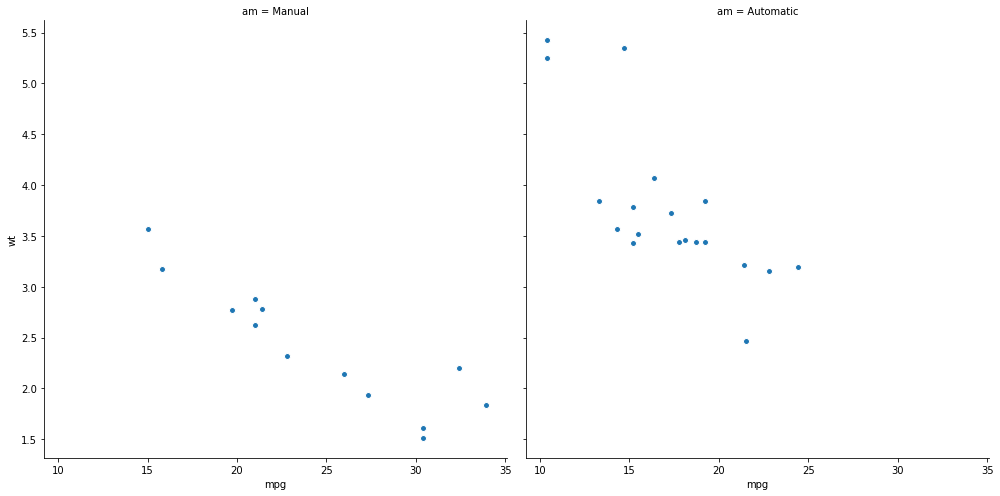

In [225]:
g = sns.FacetGrid(df, col="am", height=7)
g = g.map(plt.scatter, "mpg", "wt", edgecolor="w")

**Manual transmission** cars are **more fuel-efficient and lighter** than Automatic transmission cars. 

##**Number of Carburator**

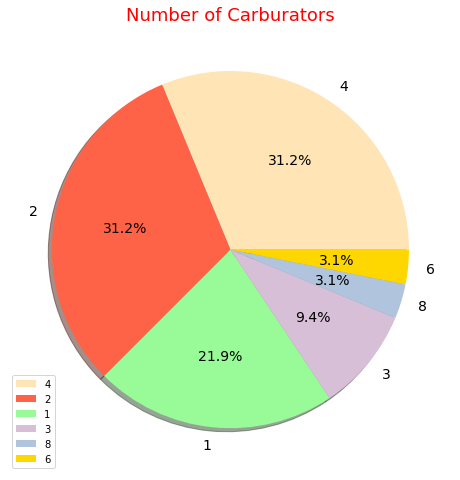

In [227]:
labels = df.carb.value_counts().index
colors = ['moccasin','tomato','palegreen','thistle','lightsteelblue','gold']
explode = [0,0,0,0,0,0]
ax = df.carb.value_counts().values
plt.figure(0,figsize = (8,16))
plt.pie(ax, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',textprops={'fontsize': 14}, shadow=True)
plt.title('Number of Carburators',color = 'red',fontsize = 18)
plt.legend(labels,loc=3)
plt.show()

Most cars have 2 and 4 carburators.